In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import pyarrow.parquet as pq
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from socket import gethostname
import dask.dataframe as dd
from time import sleep
import sweetviz as sv
#import dask_memusage

In [2]:
hostname = gethostname()

In [3]:
#Place ad06 and defect file in this folder in parquet format
path = "F:\Study\GeorgiaTech\Practicum\data" 

#
newPath = r"F:\Study\GeorgiaTech\Practicum\data\NewUpload"

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
display(onlyfiles)

newFiles= [f for f in listdir(newPath) if isfile(join(newPath, f))]
newFiles

['20211207_ad06_GATECH.parquet',
 '20211207_brincl_GATECH.parquet',
 '20211207_zmat_GATECH.parquet',
 'Defects Data Tableau FY21 to 12-13-21 FY22 Product Quality.xlsx',
 'GA_Tech_data_columns.txt',
 'OneDrive_1_2-14-2022.zip',
 '~$Defects Data Tableau FY21 to 12-13-21 FY22 Product Quality.xlsx']

['add_ad06_1.csv',
 'add_ad06_10.csv',
 'add_ad06_2.csv',
 'add_ad06_3.csv',
 'add_ad06_4.csv',
 'add_ad06_5.csv',
 'add_ad06_6.csv',
 'add_ad06_7.csv',
 'add_ad06_8.csv',
 'add_ad06_9.csv',
 'non-defect columns GT.xlsx',
 'ship1.csv',
 'ship2.csv',
 'ship3.csv',
 'ship4.csv',
 'ship5.csv']

In [4]:
report_path = path + "\\Defects Data Tableau FY21 to 12-13-21 FY22 Product Quality.xlsx"
ad06_path = path + "\\20211207_ad06_GATECH.parquet"
brincl_path = path + "\\20211207_brincl_GATECH.parquet"
zmat_path = path + "\\20211207_zmat_GATECH.parquet"

### No longer needed -  Read the new add_ad06 and ship files

In [5]:
# newFilesList_add = [i for i in newFiles if 'add_ad06_' in i]
# newFilesList_ship = [i for i in newFiles if 'ship' in i]
# newFilesList_add, newFilesList_ship

In [6]:
def load_files(filenames, path):
    for filename in filenames:
        yield pd.read_csv(path + "\\" + filename)

In [7]:
# add_ad06_df = pd.concat(load_files(newFilesList_add, newPath))
# len(add_ad06_df)

In [8]:
# ship_df = pd.concat(load_files(newFilesList_ship, newPath))
# len(ship_df)

### Read the newer Ship + Product Hierarchy files

In [9]:
newerPathProduct = r"F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product Hierarchy 2-21-2022"
for a in ['2020','2021','2022']:
    p = newerPathProduct+'\\'+a
    newerfilesProduct = [f for f in listdir(p) if isfile(join(p, f))]
    
    for i, k in enumerate(newerfilesProduct):
        print (a,i, p)
        if a == '2020' and i == 0:
            ship_product_df = pd.read_excel(p+'\\'+k)
        else:
            ship_product_df = ship_product_df.append(pd.read_excel(p+'\\'+k))

2020 0 F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product Hierarchy 2-21-2022\2020
2020 1 F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product Hierarchy 2-21-2022\2020
2020 2 F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product Hierarchy 2-21-2022\2020
2020 3 F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product Hierarchy 2-21-2022\2020
2020 4 F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product Hierarchy 2-21-2022\2020
2020 5 F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product Hierarchy 2-21-2022\2020
2020 6 F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product Hierarchy 2-21-2022\2020
2020 7 F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product Hierarchy 2-21-2022\2020
2020 8 F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Product

### Read the newer Pieces Shipped + Shipping Type files

In [10]:
newerPathProduct = r"F:\Study\GeorgiaTech\Practicum\data\OneDrive_2_3-10-2022\Pieces Shipped + Shipping Type 3-10-2022"
p = newerPathProduct
newerfilesProduct = [f for f in listdir(p) if isfile(join(p, f)) and 'Shipping type dict.xlsx' not in f]

for i, k in enumerate(newerfilesProduct):
    print (i, k)
    if i == 0:
        pieces_shiptype_df = pd.read_excel(p+'\\'+k)
    else:
        pieces_shiptype_df = pieces_shiptype_df.append(pd.read_excel(p+'\\'+k))

0 1-1-20 to 3-31-20.xlsx
1 10-1-20 to 11-30-20.xlsx
2 10-1-21 to 11-30-21.xlsx
3 12-1-20 to 1-31-21.xlsx
4 12-1-21 to 1-31-22.xlsx
5 2-1-21 to 3-31-21.xlsx
6 4-1-20 to 5-31-20.xlsx
7 4-1-21 to 5-31-21.xlsx
8 6-1-20 to 7-31-20.xlsx
9 6-1-21 to 7-31-21.xlsx
10 8-1-20 to 9-30-20.xlsx
11 8-1-21 to 9-30-21.xlsx


### Read ad06 File

In [11]:
%%time
ad06_df = pd.read_parquet(ad06_path)

Wall time: 4min 22s


In [12]:
%%time
#ad06_df_dask = dd.read_parquet(ad06_path)

Wall time: 387 ms


In [13]:
#len(ad06_df_dask)

In [14]:
#ad06_df_dask.head(200)

### Read Defect File

In [15]:
report_data = pd.read_excel(report_path)

In [16]:
report_data.head()

,Dealer Name,Sales Order,SR#,Customer Calculation,Sales Order item,Reporting Plant,Replacement SO,Value Stream / Vendor,Quality Treatment,Cause Code Concat,...,Work Center/Resource,Workcenter Text,Zparcmatl___T,Zsalesdoc__Zasdarea___T,Zsalesdoc__Zavparea___T,Days to Ship,FedEx Defect Qty,FedEx DPPM,FedEx Pieces Shipped,Net Value of Order Item
0,Interior Workplace Solutions Llc,7905468,800277284,Lehigh Valley Health Network Inc.,10,Kentwood Seating,7935627,SERIES 1,PRODUCT QUALITY,PD05 - Concealed Damage,...,S200000,SERIES ONE CELL,SHIPPING UNIT - SERIES ONE TASK CHAIR,Mid Atlantic North America,Americas East,20,NaN,NaN,NaN,0
1,Business Furnishings (sask) Ltd,7944156,800303304,Conexus Credit Union 2006,30,Athens Plant,8158198,GROW,PRODUCT QUALITY,2250 - Finish Coverage,...,AWESTELM,ATP WEST ELM,Linear C Table,Canada,Americas North,150,NaN,NaN,NaN,0
2,Not Assigned,7884621,800286322,Amq Scal Warehouse *,10,AMEX Plant,8004688,DA-505,PRODUCT QUALITY,2250 - Finish Coverage,...,DA-505,ATP CURRENCY DUO,"Worksurface (59.75""W x 30""D x 1""H)",West Coast North America,Americas West,137,NaN,NaN,NaN,0
3,Dancker,8349739,800337880,The Trustees Of Princeton University,10,AMEX Plant,8389452,DA-960-P,PRODUCT QUALITY,2255 - Mfg Visual Defects,...,DA-960-P,MPO KNIFE EDGE TABLES,"WORKSURFACE-TBL,MTG,12-14 PPL,RCT,47,CTR",New York-New Jersey,Americas North,7,NaN,NaN,NaN,0
4,K B M Office Equipment Inc,7926139,800300599,Alphabet Inc.,70,Finished Goods,8245814,GENESIS SEATING INC,PRODUCT QUALITY,PD05 - Concealed Damage,...,NaN,NaN,GOOGLE OB AIR-45-US-HIGH SQUARE OPENING,West Coast North America,Americas West,10,NaN,NaN,NaN,0


### Create Wordcloud On Defect Text

In [17]:
problemText = report_data[report_data['Value Stream / Vendor']=='Components']
problemText  = problemText[problemText['Dealer Problem Statement'].notna()]['Dealer Problem Statement'].values
problemText = list(problemText)
len(problemText)

3728

In [18]:
wordlist = []
for j in problemText:
    wordlist += [i for i in re.split(r"[-;,.\s]\s*",j) if len(i) > 3]
text = ' '.join([i for i in wordlist])
text

'SKIN MAKERBOARD ARRIVED WITH DIFFERENT SIZE RECEIVED FULL POST LINE TYPE) INSTEAD POST CANNOT PROPERLY ASSEMBLE PHOTO PLEASE ADVISE HAVE ADDITIONAL BASE PLATES RECEIVED 36"W NEEDED 30"W ADDITIONAL BASE PLATES NEEDED THANKS HELLO TEAM JUNCTION ENDS ARRIVED WRONG MEASUREMENT THEY WERE SUPPOSED THEY THEY SHORT THEREFOR NEED HAVE THEM REPLACED PLEASE THANK PAINT HORIZONTAL PACKAGE NEED REPLACEMENT ASAP PROJECT MANAGER SENT ATTACHED PICS DOING THIS INSTALL TODAY SAID LOOKS LIKE TRIMSWERE MANUFACTURED INCORRECTLY BOTTOM CLIP TABLES CONTROL MODULE WORKING (SERV PART 1298401001SR) TABLE CONTROLLER WORKING (SERV PART 1298394001SR) TABLE CABLE POWER RECEIVED (SERV PART 22047321SR RUNS FLUSH FRAME DAMAGED PANEL MISSING SECTION POLES ATTACHED IMAGES ADVISE REPLACEMENT PART NUMBER THANKS HAVE CORRECT QUANTITY TRIM PIECES HAVE INILINE CONNECTORS THAT SHOULD CONNECTORS SURE WHICH LINE ERROR NEED THESE TRIMS WERE MADE WITH ATTACHMENT CLIPS WRONG POSITIONS CANNOT ATTACH NEED TRIM METAL DENTS JUNCTION 

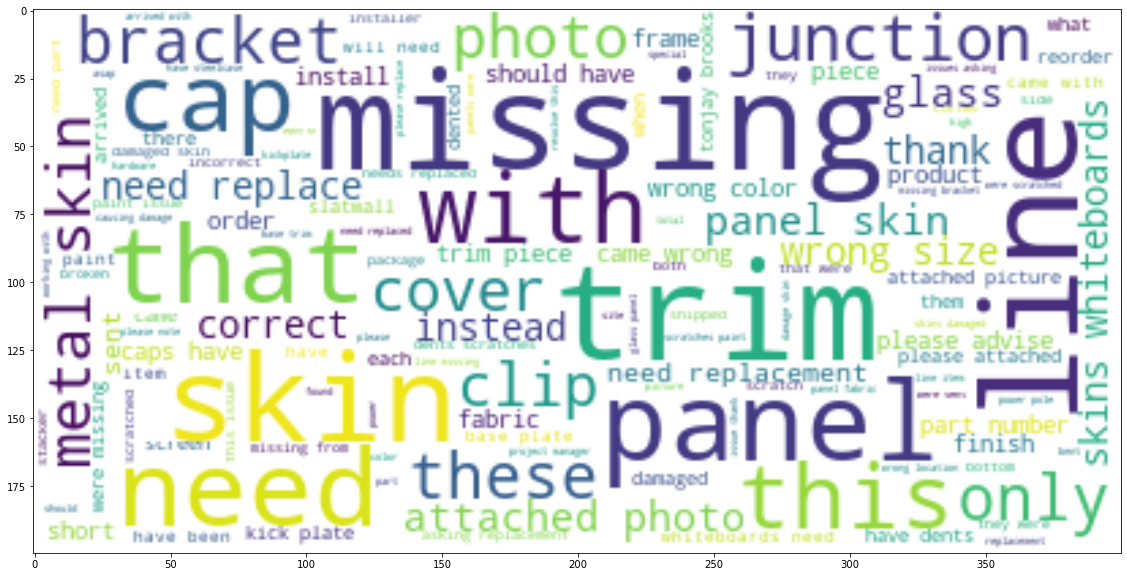

In [19]:
problemText = report_data[report_data['Value Stream / Vendor']=='Components']
problemText  = problemText[problemText['Dealer Problem Statement'].notna()]['Dealer Problem Statement'].values
problemText = list(problemText)
wordlist = []
for j in problemText:
    wordlist += [i for i in re.split(r"[-;,.\s]\s*",j) if len(i) > 3]
text =  ' '.join([i for i in wordlist])
text = text.lower()
exclude = ['DONT','ORDERED','received']    
wordcloud = WordCloud(stopwords=exclude,max_font_size=50, max_words=1000,background_color="white").generate(text)
#tweets=tweetClusters[tweetClusters.cluster==k]['tweet']         
#print(tweets.to_string(index=False))
#plt.subplot(2,3,k+1).title.set_text("Cluster#{}".format(k+1))
fix,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,10))
#plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")

### Sweetviz Analysis

In [20]:
#Takes long time - Uncomment as needed 


#excludeCols = ['Replacement SO','Sales Order','Reference Notification #', \
#               'CIC_Impact','Carrier Name','Material','Material (Parcel)','Reporting Plant','Shipment type' \
#              ,'Ultimate Customer State','Ultimate Customer Zip','Work Center/Resource']
#defects_report = sv.analyze(report_data[report_data.columns[~report_data.columns.isin(excludeCols)]])

In [21]:
#defects_report.show_html('EDA.html')

### Reading brincl, zmat files - Commenting this out unless we need this

In [22]:
#brincl_df = pd.read_parquet(brincl_path)
#zmat_df = pd.read_parquet(zmat_path                         

In [23]:
#ad06_df = ad06_df_pandas
#len(brincl_df), len(zmat_df), len(ad06_df)

In [24]:
#brincl_df.info(memory_usage="deep")

In [25]:
#zmat_df.info(memory_usage="deep")

In [26]:
#ad06_df.info(memory_usage="deep")

In [27]:
#brincl_df.info(memory_usage="True")
#zmat_df.info(memory_usage="True")
#ad06_df.info(memory_usage="True")

In [28]:
#zmat_df.head(10)

In [29]:
#parquet_file = pq.ParquetFile(brincl_path)

### Analyze AD06 File  and write sample to csv to analyze and document

In [30]:
#ad06_df.describe()

In [31]:
ad06_df.head(100)

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,4ZSD_AD06_ZZORGDLRDLVYDATE,4ZSD_AD06_ZZPACKVORSCHR,4ZSD_AD06_ZZPRCQTE,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_BRGEW,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT
0,0007227476,000010,000000,Z100,GR-Unsupported Products,00000000,20180625,LB,Pound,000,...,20180104,C,,,100.002000000000000000,2.000000000000000000,100.002000000000000000,120.002000000000000000,120.004000000000000000,100.004000000000000000
1,0007236281,000428,000390,5500,SC Wood Plant,20200710,20200602,LB,Pound,015,...,00000000,C,,,343.046000000000000000,22.000000000000000000,343.046000000000000000,64.592000000000000000,145.333000000000000000,391.232000000000000000
2,0007236284,000200,000190,8300,AMEX Plant,20210126,20180704,LB,Pound,009,...,20201005,C,16Z06806,,50.804000000000000000,1.000000000000000000,50.804000000000000000,0.001000000000000000,5.402000000000000000,57.436000000000000000
3,0007238833,000180,000000,8300,AMEX Plant,20201103,20180706,LB,Pound,002,...,20191206,,18Z02615,,0E-18,4.000000000000000000,0E-18,0E-18,0E-18,0E-18
4,0007238834,000350,000340,6000,Kentwood Plant,20201105,20200805,LB,Pound,015,...,00000000,C,18Z02615,,104.166000000000000000,2.000000000000000000,104.166000000000000000,0.002000000000000000,2.706000000000000000,107.826000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0007754533,000840,000000,4000,Athens Plant,20200611,20191014,LB,Pound,025,...,20200414,C,18Z05603,,0E-18,1.000000000000000000,0E-18,0E-18,0E-18,0E-18
96,0007754533,001800,000000,8800,Finished Goods,20200610,20191014,LB,Pound,000,...,20200414,C,18Z05603,,34.200000000000000000,190.000000000000000000,34.200000000000000000,9.500000000000000000,1.305000000000000000,36.700000000000000000
97,0007755886,001140,000000,6000,Kentwood Plant,00000000,20191015,LB,Pound,032,...,20200312,C,14Z07530,,0E-18,1.000000000000000000,0E-18,0E-18,0E-18,0E-18
98,0007757339,003070,003050,4000,Athens Plant,00000000,20191016,LB,Pound,132,...,20191126,C,19Z06922,X,1.705000000000000000,1.000000000000000000,1.705000000000000000,0.001000000000000000,0.251000000000000000,1.995000000000000000


In [32]:
#ad06_df_samplerows = ad06_df.head(100)
#ad06_df_samplerows.to_csv('ad06_df_samplerows.csv')

In [33]:
#len(ad06_df)

In [34]:
ad06_df[ad06_df['4ZSD_AD06_VBELN'] == '0007853723'].sort_values(by='4ZSD_AD06_POSNR')

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,4ZSD_AD06_ZZORGDLRDLVYDATE,4ZSD_AD06_ZZPACKVORSCHR,4ZSD_AD06_ZZPRCQTE,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_BRGEW,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT
836540,0007853723,000010,000000,6000,Kentwood Plant,20200609,20200117,LB,Pound,002,...,20200326,C,20Z00023,,0E-18,90.000000000000000000,0E-18,0E-18,0E-18,0E-18
6808837,0007853723,000020,000010,6000,Kentwood Plant,20200622,20200117,LB,Pound,002,...,20200326,C,20Z00023,,2142.450000000000000000,90.000000000000000000,2142.450000000000000000,0.090000000000000000,174.420000000000000000,2393.550000000000000000
342873,0007853723,000030,000010,6000,Kentwood Plant,20200622,20200117,LB,Pound,002,...,20200326,C,20Z00023,,2142.450000000000000000,90.000000000000000000,2142.450000000000000000,0.090000000000000000,174.420000000000000000,2393.550000000000000000
684827,0007853723,000040,000010,6000,Kentwood Plant,20200622,20200117,LB,Pound,002,...,20200326,C,20Z00023,,2430.000000000000000000,90.000000000000000000,2430.000000000000000000,360.000000000000000000,612.900000000000000000,3006.900000000000000000
2390316,0007853723,000050,000010,6000,Kentwood Plant,20200615,20200117,LB,Pound,002,...,20200326,C,20Z00023,,1293.660000000000000000,90.000000000000000000,1293.660000000000000000,90.000000000000000000,82.080000000000000000,1509.660000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026283,0007853723,000950,000000,4000,Athens Plant,20200604,20200117,LB,Pound,030,...,20200326,,20Z00023,,0E-18,30.000000000000000000,0E-18,0E-18,0E-18,0E-18
3230511,0007853723,000960,000950,4000,Athens Plant,20200604,20200117,LB,Pound,030,...,20200326,C,20Z00023,,108.240000000000000000,30.000000000000000000,108.240000000000000000,75.000000000000000000,58.395000000000000000,138.240000000000000000
2887548,0007853723,000970,000950,4000,Athens Plant,20200604,20200117,LB,Pound,030,...,20200326,C,20Z00023,,149.340000000000000000,30.000000000000000000,149.340000000000000000,0.030000000000000000,1.684000000000000000,152.140000000000000000
2734747,0007853723,000980,000000,8800,Finished Goods,20200604,20200117,LB,Pound,001,...,20200326,C,20Z00023,,0E-18,120.000000000000000000,0E-18,0E-18,0.240000000000000000,0.240000000000000000


In [35]:
ad06_df[ad06_df['4ZSD_AD06_VBELN'] == '0007853723'].sort_values(by='4ZSD_AD06_POSNR').to_csv('ad06_df_samplerows_7853723.csv')

In [36]:
ad06_df[ad06_df['4ZSD_AD06_VBELN'] == '0007778475'].to_csv('ad06_df_samplerows_7778475.csv') #7778475
report_data[report_data['Sales Order'] == 7778475].to_csv('DefectFile_samplerows_7778475') #7778475

### Analyze BRINCL File and write sample to csv to analyze and document

In [37]:
#brincl_df.describe()

In [38]:
#brincl_df.head()

In [39]:
#brincl_df_samplerows = brincl_df.head(100)
#brincl_df_samplerows.to_csv('brincl_df_samplerows.csv')

In [40]:
#brincl_df[brincl_df['ZSALESDOC'] == '0007853723'].sort_values(by='0S_ORD_ITEM').to_csv('brincl_df_samplerows_7853723.csv')

### Analyze ZMAT File

In [41]:
#zmat_df.describe()

In [42]:
#zmat_df.head()

In [43]:
#zmat_df_samplerows = zmat_df.head(100)
#zmat_df_samplerows.to_csv('zmat_df_samplerows.csv')

In [44]:
#zmat_df[zmat_df['ZMATERIAL']=='24315601']

### Analyze Report File

In [45]:
report_data.head()

,Dealer Name,Sales Order,SR#,Customer Calculation,Sales Order item,Reporting Plant,Replacement SO,Value Stream / Vendor,Quality Treatment,Cause Code Concat,...,Work Center/Resource,Workcenter Text,Zparcmatl___T,Zsalesdoc__Zasdarea___T,Zsalesdoc__Zavparea___T,Days to Ship,FedEx Defect Qty,FedEx DPPM,FedEx Pieces Shipped,Net Value of Order Item
0,Interior Workplace Solutions Llc,7905468,800277284,Lehigh Valley Health Network Inc.,10,Kentwood Seating,7935627,SERIES 1,PRODUCT QUALITY,PD05 - Concealed Damage,...,S200000,SERIES ONE CELL,SHIPPING UNIT - SERIES ONE TASK CHAIR,Mid Atlantic North America,Americas East,20,NaN,NaN,NaN,0
1,Business Furnishings (sask) Ltd,7944156,800303304,Conexus Credit Union 2006,30,Athens Plant,8158198,GROW,PRODUCT QUALITY,2250 - Finish Coverage,...,AWESTELM,ATP WEST ELM,Linear C Table,Canada,Americas North,150,NaN,NaN,NaN,0
2,Not Assigned,7884621,800286322,Amq Scal Warehouse *,10,AMEX Plant,8004688,DA-505,PRODUCT QUALITY,2250 - Finish Coverage,...,DA-505,ATP CURRENCY DUO,"Worksurface (59.75""W x 30""D x 1""H)",West Coast North America,Americas West,137,NaN,NaN,NaN,0
3,Dancker,8349739,800337880,The Trustees Of Princeton University,10,AMEX Plant,8389452,DA-960-P,PRODUCT QUALITY,2255 - Mfg Visual Defects,...,DA-960-P,MPO KNIFE EDGE TABLES,"WORKSURFACE-TBL,MTG,12-14 PPL,RCT,47,CTR",New York-New Jersey,Americas North,7,NaN,NaN,NaN,0
4,K B M Office Equipment Inc,7926139,800300599,Alphabet Inc.,70,Finished Goods,8245814,GENESIS SEATING INC,PRODUCT QUALITY,PD05 - Concealed Damage,...,NaN,NaN,GOOGLE OB AIR-45-US-HIGH SQUARE OPENING,West Coast North America,Americas West,10,NaN,NaN,NaN,0


In [46]:
report_data[report_data['Sales Order'] == 7853723]

,Dealer Name,Sales Order,SR#,Customer Calculation,Sales Order item,Reporting Plant,Replacement SO,Value Stream / Vendor,Quality Treatment,Cause Code Concat,...,Work Center/Resource,Workcenter Text,Zparcmatl___T,Zsalesdoc__Zasdarea___T,Zsalesdoc__Zavparea___T,Days to Ship,FedEx Defect Qty,FedEx DPPM,FedEx Pieces Shipped,Net Value of Order Item
25673,Heritage Office Furnishings Ltd,7853723,800277516,Aftershock Games Gmbh,410,Athens Plant,7947249,Components,PRODUCT QUALITY,1150 - Wrong Style,...,5421670,BLACK LINE (VAR - PREVIOUSLY RFC),"HORIZONTAL PKG,HIGH CAP,FENCE,48W",Canada,Americas North,18,NaN,NaN,NaN,0


In [47]:
report_data.columns

Index(['Dealer Name', 'Sales Order', 'SR#', 'Customer Calculation',
       'Sales Order item', 'Reporting Plant ', 'Replacement SO',
       'Value Stream / Vendor', 'Quality Treatment', 'Cause Code Concat ',
       ...
       'Work Center/Resource', 'Workcenter Text', 'Zparcmatl___T',
       'Zsalesdoc__Zasdarea___T', 'Zsalesdoc__Zavparea___T', 'Days to Ship',
       'FedEx Defect Qty', 'FedEx DPPM', 'FedEx Pieces Shipped',
       'Net Value of Order Item'],
      dtype='object', length=105)

In [48]:
#a = report_data[report_data['Value Stream / Vendor'] == 'Components'].groupby(['Sales Order','Sales Order item','Cause Code Concat '])

In [49]:
#a.filter(lambda x: len(x) > 1)

In [50]:
report_data[report_data['Sales Order'] == 7867807].to_csv('KK.csv')

In [51]:
ad06_df[ad06_df['4ZSD_AD06_VBELN'].str.contains('7867807')]

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,4ZSD_AD06_ZZORGDLRDLVYDATE,4ZSD_AD06_ZZPACKVORSCHR,4ZSD_AD06_ZZPRCQTE,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_BRGEW,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT


In [52]:
#Example from Sourabh Video on Feb22
#a = report_data[(report_data['Sales Order'] == 7888235) & (report_data['Sales Order item'].isin([2100,2110]))].sort_values('SR#')
#a

#b = ad06_df[ad06_df['4ZSD_AD06_VBELN'].str.contains('7888235')]
#b

### Analyze add_ad06 file

In [53]:
#add_ad06_df.head()

In [54]:
#add_ad06_df_samplerows = add_ad06_df.head(100)
#add_ad06_df_samplerows.to_csv('add_ad06_df_samplerows.csv')
#add_ad06_df[add_ad06_df['4ZSD_AD06_VBELN'] == 7853723].sort_values(by='4ZSD_AD06_POSNR')

In [55]:
#add_ad06_df[add_ad06_df['4ZSD_AD06_VBELN'] == 7853723].sort_values(by='4ZSD_AD06_POSNR') \
#.to_csv('add_ad06_df_samplerows_7853723.csv')

### Analyze ship file

In [56]:
#ship_df.head()

In [57]:
#ship_df_samplerows = ship_df.head(100)
#ship_df_samplerows.to_csv('ship_df_samplerows.csv')
#add_ad06_df[add_ad06_df['4ZSD_AD06_VBELN'] == 7853723].sort_values(by='4ZSD_AD06_POSNR')

In [58]:
#ship_df[ship_df['SL_ORD_ID'] == 7888235]

### Joining all datasets

### *Below are the dataframe names*
* ad06_df - This is the ad06 File
* ship_product_df - This is the shipping + product hierarchy files 
* pieces_shiptype_df - This is the shipping + pieces files
* report_data - This is the defect dataset 

In [59]:
ad06_df.shape, ad06_df.columns, \
report_data.shape, report_data.columns, \
ship_product_df.shape, ship_product_df.columns, \
pieces_shiptype_df.shape, pieces_shiptype_df.columns
#zmat_df.shape, zmat_df.columns,\
#add_ad06_df.shape,add_ad06_df.columns, \
#brincl_df.shape,brincl_df.columns, \

((7606138, 42),
 Index(['4ZSD_AD06_VBELN', '4ZSD_AD06_POSNR', '4ZSD_AD06_UEPOS', '0PLANT',
        '0PLANT___T', '0UPD_DATE', '4ZSD_AD06_ERDAT', '4ZSD_AD06_GEWEI',
        '4ZSD_AD06_GEWEI___T', '4ZSD_AD06_GRKOR', '4ZSD_AD06_GSBER',
        '4ZSD_AD06_KONDM', '4ZSD_AD06_LPRIO', '4ZSD_AD06_MATKL',
        '4ZSD_AD06_MATNR', '4ZSD_AD06_MFRGR', '4ZSD_AD06_PRCTR',
        '4ZSD_AD06_PSTYV', '4ZSD_AD06_ROUTE', '4ZSD_AD06_STKEY',
        '4ZSD_AD06_STLNR', '4ZSD_AD06_STLTY', '4ZSD_AD06_VOLEH',
        '4ZSD_AD06_VOLEH___T', '4ZSD_AD06_VSTEL', '4ZSD_AD06_ZZCARTIND',
        '4ZSD_AD06_ZZCONF_DELV', '4ZSD_AD06_ZZCONF_MAD', '4ZSD_AD06_ZZCONPATH',
        '4ZSD_AD06_ZZCUSTREQDATE', '4ZSD_AD06_ZZLINEPACKAGE',
        '4ZSD_AD06_ZZMPBLDDATE', '4ZSD_AD06_ZZORGDLRDLVYDATE',
        '4ZSD_AD06_ZZPACKVORSCHR', '4ZSD_AD06_ZZPRCQTE',
        '4ZSD_AD06_ZZTUSPCLIND', '4ZSD_AD06_BRGEW', '4ZSD_AD06_KBMENG',
        '4ZSD_AD06_NTGEW', '4ZSD_AD06_VOLUM', '4ZSD_AD06_ZZLINEVOLUME',
        '4ZSD_AD06_ZZLINEWEI

In [60]:
#ad06_df.shape, add_ad06_df.shape

#display(ad06_df[ad06_df['4ZSD_AD06_VBELN'] == '0007888235']  )
#add_ad06_df[add_ad06_df['4ZSD_AD06_VBELN'] == 7888235]
#brincl_df.head()
#ship_product_df[ship_product_df['Value Stream'] == 'Components'].count()

#ad06_df[ad06_df['4ZSD_AD06_VBELN'] == '0007888235']

#ship_product_df[ship_product_df['Sales Order']==7888235]

#report_data[report_data['Sales Order']==7888235]#.to_csv('defect_df_7888235.csv')

#pieces_shiptype_df[pieces_shiptype_df['Sales Order']==7888235].to_csv('pieces_shiptype_7888235.csv')

### Filter out from ship_product_df only those orders which have Values Stream = Components in it

In [61]:
# Filter all rows which have Value Stream = Components 
a = ship_product_df[ship_product_df['Value Stream']=='Components'] #878319 total line items with Components

# Remove duplicate Sales Orders from the above filtered dataset
b = a.drop_duplicates(subset='Sales Order',keep="last") #56102 unique sales orders

# Filter the ship_product_df based on dataframe b
c = pd.merge(ship_product_df,b[['Sales Order']]) #2590885  total order + line item combo which have some line items which are value stream = 'Components'


In [62]:
c[(c['Sales Order']==7507558) & (c['Sales Order item'] == 580)]

,Sales Order,Sales Order item,PCC,Product Line,Value Stream,Act Ship Com Dt,Reporting Plant,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Material (Parcel),Unnamed: 12,Work Center,Pieces Shipped
810789,7507558,580,TS Single-Door Lockers,TS Lockers,Not assigned,2020-05-23,Finished Goods,Furniture,Storage,Laterals,Group Storage,1119530001001,"CABINET - LOCKER,SINGLE,DOOR",8800/Not assigned,8
811345,7507558,580,TS Single-Door Lockers,TS Lockers,Not assigned,2020-06-03,Finished Goods,Furniture,Storage,Laterals,Group Storage,1119530001001,"CABINET - LOCKER,SINGLE,DOOR",8800/Not assigned,2


In [63]:
# Get sum of columns - indirectly, the pieces shipped column 
k = c.groupby(['Sales Order','Sales Order item'], as_index=False).sum()

# Remove duplicates from the dataframe c
l = c.drop_duplicates(subset = ['Sales Order','Sales Order item'],keep="last")
#k.filter(lambda x: len(x['PCC']) > 1)

#l.head(20)

#k.shape
#k[k['PCC'] > 1] #Potentially 10k rows have dups - For these we will need to put the pieces shipped and shipped date in an array

#k[k['Sales Order']==7143685]

#k[k['Sales Order'] == 7507558]
#k.shape,l.shape, c.shape, 2590885 - 2579649

In [64]:
# This dataset will merge k and l - Will include unique rows for Sales Order + Sales Order item, with pieces shipped summed up

kl = k.merge(l,on=['Sales Order','Sales Order item'])

In [65]:
# Remove Pieces Shipped_y from dataframe l
kl = kl.drop(['Pieces Shipped_y'], axis=1)

kl.head()
kl.shape, k.shape, l.shape, c.shape
c.head()

c.columns, kl.columns

(Index(['Sales Order', 'Sales Order item', 'PCC', 'Product Line',
        'Value Stream', 'Act Ship Com Dt', 'Reporting Plant', 'GM Category',
        'Op Prod Category', 'Product Sub-Cat', 'PL Category',
        'Material (Parcel)', 'Unnamed: 12', 'Work Center', 'Pieces Shipped'],
       dtype='object'),
 Index(['Sales Order', 'Sales Order item', 'Pieces Shipped_x', 'PCC',
        'Product Line', 'Value Stream', 'Act Ship Com Dt', 'Reporting Plant',
        'GM Category', 'Op Prod Category', 'Product Sub-Cat', 'PL Category',
        'Material (Parcel)', 'Unnamed: 12', 'Work Center'],
       dtype='object'))

### kl is the dataframe which has unique orders from the shipping + product type file and duplicate rows have number of pieces summed up 

In [66]:
#Make Sales order 10 characters in length , Sales Order Item 6 characters in length to join to ad06
kl['Sales Order'] = kl['Sales Order'].apply('{:0>10}'.format)
kl['Sales Order item'] = kl['Sales Order item'].apply('{:0>6}'.format)

In [67]:
#Example of a sales order which had 2 rows on the ship data, but only 1 row in the kl data after aggregating. We are retaining the most recent ship date for this dataset
display(kl[(kl['Sales Order']=='0007888235') & (kl['Sales Order item']=='001990')])
display(c[(c['Sales Order']==7888235) & (c['Sales Order item']==1990)])

,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,Value Stream,Act Ship Com Dt,Reporting Plant,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Material (Parcel),Unnamed: 12,Work Center
427667,0007888235,001990,20,KICK POWER,Kick,Not assigned,2020-09-11,Finished Goods,Furniture,Power & Components,Systems,Panels,TSAE33DB15S,REC 4 CIRCUIT 2+2 LINE 3 15AMP 6PK,4000/Not assigned


,Sales Order,Sales Order item,PCC,Product Line,Value Stream,Act Ship Com Dt,Reporting Plant,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Material (Parcel),Unnamed: 12,Work Center,Pieces Shipped
150782,7888235,1990,KICK POWER,Kick,Not assigned,2020-10-05,Finished Goods,Furniture,Power & Components,Systems,Panels,TSAE33DB15S,REC 4 CIRCUIT 2+2 LINE 3 15AMP 6PK,4000/Not assigned,2
150900,7888235,1990,KICK POWER,Kick,Not assigned,2020-09-11,Finished Goods,Furniture,Power & Components,Systems,Panels,TSAE33DB15S,REC 4 CIRCUIT 2+2 LINE 3 15AMP 6PK,4000/Not assigned,18


### Write kl, ad06 to file to see if i can load to SQL Server

In [68]:
#ad06_df.to_csv(r'F:\Study\GeorgiaTech\Practicum\data\Output\ad06_df.csv')

In [69]:
#kl.to_csv(r'F:\Study\GeorgiaTech\Practicum\data\Output\kl.csv')
#add_ad06_df.to_csv(r'F:\Study\GeorgiaTech\Practicum\data\Output\add_ad06_df.csv')
#pieces_shiptype_df.to_csv(r'F:\Study\GeorgiaTech\Practicum\data\Output\pieces_shiptype_df.csv')

### It looks like there are some rows on the kl dataset (ie shipping product hierarchy dataset) which are not on the ad06 dataset. We will ignore those from analysis since we need attributes from ad06 for modeling

In [70]:
ad06_kl = ad06_df.merge(kl,left_on=['4ZSD_AD06_VBELN','4ZSD_AD06_POSNR'], right_on = ['Sales Order','Sales Order item'])

In [71]:
ad06_kl.shape, kl.shape, ad06_df.shape

((2123206, 57), (2579649, 15), (7606138, 42))

In [72]:
#del ad06_kl

In [73]:
#This LEFT join was to find out which rows in kl dataframe are not in the ad06 dataframe. Not needed for reruns
#kl_ad = kl.merge(ad06_df,left_on=['Sales Order','Sales Order item'],right_on=['4ZSD_AD06_VBELN','4ZSD_AD06_POSNR'],how='left')
#only = kl_ad[kl_ad['4ZSD_AD06_VBELN'].isnull()]

In [74]:
#Example of sales order item which have LESS ROWS IN ad06 and more rows in the shipping dataset
display(ad06_df[ad06_df['4ZSD_AD06_VBELN']=='0007143685'].sort_values(by=['4ZSD_AD06_POSNR']))
display(ship_product_df[ship_product_df['Sales Order']==7143685].sort_values(by=['Sales Order item']))
display(kl[kl['Sales Order']=='0007143685'].sort_values(by=['Sales Order item']))

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,4ZSD_AD06_ZZORGDLRDLVYDATE,4ZSD_AD06_ZZPACKVORSCHR,4ZSD_AD06_ZZPRCQTE,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_BRGEW,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT
5895073,0007143685,000010,000000,8300,AMEX Plant,00000000,20180411,LB,Pound,001,...,20190712,C,18Z01974,,0E-18,42.000000000000000000,0E-18,0E-18,0E-18,0E-18
5856855,0007143685,000020,000010,8300,AMEX Plant,00000000,20180411,LB,Pound,001,...,20190712,C,18Z01974,,1852.872000000000000000,42.000000000000000000,1852.872000000000000000,168.000000000000000000,212.058000000000000000,1936.872000000000000000
4716352,0007143685,000030,000010,8300,AMEX Plant,00000000,20180411,LB,Pound,001,...,20190712,C,18Z01974,,2807.994000000000000000,42.000000000000000000,2807.994000000000000000,605.892000000000000000,817.500000000000000000,2832.369000000000000000
6008833,0007143685,000330,000000,8300,AMEX Plant,00000000,20180411,LB,Pound,012,...,20190712,C,18Z01974,,0E-18,16.000000000000000000,0E-18,0E-18,0E-18,0E-18
6808050,0007143685,000340,000330,8300,AMEX Plant,00000000,20180411,LB,Pound,012,...,20190712,C,18Z01974,,1610.128000000000000000,16.000000000000000000,1610.128000000000000000,20.000000000000000000,327.000000000000000000,1702.770000000000000000
7529792,0007143685,000390,000000,8300,AMEX Plant,00000000,20180411,LB,Pound,014,...,20190712,C,18Z01974,,0E-18,1.000000000000000000,0E-18,0E-18,0E-18,0E-18
2657864,0007143685,000400,000390,8300,AMEX Plant,00000000,20180411,LB,Pound,014,...,20190712,C,18Z01974,,55.686000000000000000,1.000000000000000000,55.686000000000000000,0.999000000000000000,14.217000000000000000,56.415000000000000000
4259979,0007143685,000470,000000,8300,AMEX Plant,00000000,20180411,LB,Pound,017,...,20190712,C,18Z01974,,0E-18,2.000000000000000000,0E-18,0E-18,0E-18,0E-18
2695926,0007143685,000480,000470,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,017,...,00000000,C,18Z01974,,4.426000000000000000,2.000000000000000000,4.426000000000000000,0.002000000000000000,0.326000000000000000,6.426000000000000000
4640372,0007143685,000485,000470,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,017,...,00000000,C,18Z01974,,10.132000000000000000,2.000000000000000000,10.132000000000000000,0.002000000000000000,0.580000000000000000,12.132000000000000000


,Sales Order,Sales Order item,PCC,Product Line,Value Stream,Act Ship Com Dt,Reporting Plant,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Material (Parcel),Unnamed: 12,Work Center,Pieces Shipped
0,7143685,20,Seminar/Training Tables,Akira Tables,HPL,2020-03-05,AMEX Plant,Furniture,Tables,Tables - Training,Table-Training,21624201001,"LEG - T, FIXED, CASTER, 30-36",MISC KITTING,42
1,7143685,30,Seminar/Training Tables,Akira Tables,HPL,2020-03-05,AMEX Plant,Furniture,Tables,Tables - Training,Table-Training,18573108001,"WKSF ASSY-RECT, 72 X 30, T-BASE, LAM",MPO SPECIAL CRVLNR HPL,42
2,7143685,50,Nest Seating,Kart Seating,NORTH,2020-03-05,Reynosa Plant (US),Seating,Seating - Multi-Use,Seating - Conf/General,Multi-Use Seating,201025_CHR,KART CHAIR PKG -NEST,KART NEST ASSEMBLY,91
3,7143685,320,Nest Seating,Kart Seating,NORTH,2020-03-05,Reynosa Plant (US),Seating,Seating - Multi-Use,Seating - Conf/General,Multi-Use Seating,201025_CHR,KART CHAIR PKG -NEST,KART NEST ASSEMBLY,31
4,7143685,340,Seminar/Training Tables,Akira Tables,HPL,2020-03-05,AMEX Plant,Furniture,Tables,Tables - Training,Table-Training,20918605001,"TABLE-RECT,72X30,STD HT,FLIP,T,LAM",MPO SPECIAL CRVLNR HPL,16
5,7143685,360,462 LEAP HIGH BACK,462 Leap,NORTH,2020-03-05,Reynosa Plant (US),Seating,Seating - Work Chair,Seating,Task Seating,157250_PP,LEAP CHAIR PACKAGE,Leap Trim Assembly,2
6,7143685,370,P&B: POSTS & BEAMS,Post & Beam System,Not assigned,2020-03-05,Finished Goods,Arch Solutions,Structure,Teaming,Post&Beam,946600000SR,"DATUM SHELF KIT, 30 & 36, PKG. OF 4",8800/Not assigned,6
7,7143685,380,P&B: POSTS & BEAMS,Post & Beam System,Not assigned,2020-03-05,Finished Goods,Arch Solutions,Structure,Teaming,Post&Beam,BB084,"BEAM KIT, 7 FT.",8800/Not assigned,4
8,7143685,400,Univ Tables - 3MM Edge,Universal Tables,HPL,2020-03-05,AMEX Plant,Furniture,Tables,Systems,Table-Conference,6096597001,"WKSF ASSY - ROUND, 48",MPO TOPS POSTFORM,1
9,7143685,410,P&B: Acc./Other Componen,Post & Beam System,Not assigned,2020-03-05,Finished Goods,Arch Solutions,Power & Components,Teaming,Post&Beam,BPCS,POST CARPET SHIP KIT QTY 20,8800/Not assigned,1


,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,Value Stream,Act Ship Com Dt,Reporting Plant,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Material (Parcel),Unnamed: 12,Work Center
0,0007143685,000020,42,Seminar/Training Tables,Akira Tables,HPL,2020-03-05,AMEX Plant,Furniture,Tables,Tables - Training,Table-Training,21624201001,"LEG - T, FIXED, CASTER, 30-36",MISC KITTING
1,0007143685,000030,42,Seminar/Training Tables,Akira Tables,HPL,2020-03-05,AMEX Plant,Furniture,Tables,Tables - Training,Table-Training,18573108001,"WKSF ASSY-RECT, 72 X 30, T-BASE, LAM",MPO SPECIAL CRVLNR HPL
2,0007143685,000050,91,Nest Seating,Kart Seating,NORTH,2020-03-05,Reynosa Plant (US),Seating,Seating - Multi-Use,Seating - Conf/General,Multi-Use Seating,201025_CHR,KART CHAIR PKG -NEST,KART NEST ASSEMBLY
3,0007143685,000320,31,Nest Seating,Kart Seating,NORTH,2020-03-05,Reynosa Plant (US),Seating,Seating - Multi-Use,Seating - Conf/General,Multi-Use Seating,201025_CHR,KART CHAIR PKG -NEST,KART NEST ASSEMBLY
4,0007143685,000340,16,Seminar/Training Tables,Akira Tables,HPL,2020-03-05,AMEX Plant,Furniture,Tables,Tables - Training,Table-Training,20918605001,"TABLE-RECT,72X30,STD HT,FLIP,T,LAM",MPO SPECIAL CRVLNR HPL
5,0007143685,000360,2,462 LEAP HIGH BACK,462 Leap,NORTH,2020-03-05,Reynosa Plant (US),Seating,Seating - Work Chair,Seating,Task Seating,157250_PP,LEAP CHAIR PACKAGE,Leap Trim Assembly
6,0007143685,000370,6,P&B: POSTS & BEAMS,Post & Beam System,Not assigned,2020-03-05,Finished Goods,Arch Solutions,Structure,Teaming,Post&Beam,946600000SR,"DATUM SHELF KIT, 30 & 36, PKG. OF 4",8800/Not assigned
7,0007143685,000380,4,P&B: POSTS & BEAMS,Post & Beam System,Not assigned,2020-03-05,Finished Goods,Arch Solutions,Structure,Teaming,Post&Beam,BB084,"BEAM KIT, 7 FT.",8800/Not assigned
8,0007143685,000400,1,Univ Tables - 3MM Edge,Universal Tables,HPL,2020-03-05,AMEX Plant,Furniture,Tables,Systems,Table-Conference,6096597001,"WKSF ASSY - ROUND, 48",MPO TOPS POSTFORM
9,0007143685,000410,1,P&B: Acc./Other Componen,Post & Beam System,Not assigned,2020-03-05,Finished Goods,Arch Solutions,Power & Components,Teaming,Post&Beam,BPCS,POST CARPET SHIP KIT QTY 20,8800/Not assigned


### ad06_kl is the latest dataset which has all rows from ad06 which are in the shipping_product hierarchy dataset. 
### Here we will add the ship_pieces dataset to ad06_kl 


In [75]:
#pieces_shiptype_df.head()
#Make Sales order 10 characters in length , Sales Order Item 6 characters in length to join to ad06_kl
pieces_shiptype_df['Sales Order'] = pieces_shiptype_df['Sales Order'].apply('{:0>10}'.format)
pieces_shiptype_df['Sales Order item'] = pieces_shiptype_df['Sales Order item'].apply('{:0>6}'.format)

In [76]:
#Remove unwanted columns from the df
pieces_shiptype_df= pieces_shiptype_df[['Sales Order','Sales Order item','Calendar Day',\
                                        'Shipping type','Order Shipment Code','Pieces Shipped (ALL)']]

In [77]:
#Find dups in the shipping + pieces dataset
temp = pieces_shiptype_df.groupby(['Sales Order','Sales Order item']).count()
temp[temp['Shipping type'] > 1]

#Example sales order + sales order item =  0007238834 + 000170
#del temp

Calendar Day  Shipping type  \
Sales Order Sales Order item                                
0007238834  000170                       2              2   
            000310                       2              2   
0007282820  000020                       2              2   
0007291697  000020                       2              2   
0007507558  000580                       2              2   
...                                    ...            ...   
0008475003  000020                       2              2   
0008477890  000730                       2              2   
            000750                       2              2   
0008485001  000710                       2              2   
0008488015  000020                       2              2   

                              Order Shipment Code  Pieces Shipped (ALL)  
Sales Order Sales Order item                                             
0007238834  000170                              2                     2  
            000310                              2                     2  
0007282820  000020                              2                     2  
0007291697  000020                              2                     2  
0007507558  000580                              2                     2  
...                                           ...                   ...  
0008475003  000020                              2                     2  
0008477890  000730                              2                     2  
            000750                              2                     2  
0008485001  000710                              2                     2  
0008488015  000020                              2                     2  

[17285 rows x 4 columns]

In [78]:
#Remove duplicates and add up the pieces shipped. We will keep the most recent shipment date in the output

t1 = pieces_shiptype_df.groupby(['Sales Order','Sales Order item'], as_index=False).sum()
t2 = pieces_shiptype_df.drop_duplicates(subset = ['Sales Order','Sales Order item'],keep="last")

pieces = t1.merge(t2,on=['Sales Order','Sales Order item']) \
        .drop(columns=['Pieces Shipped (ALL)_y']) \
        .rename(columns = {'Pieces Shipped (ALL)_x' : 'Pieces Shipped (ALL)'})

pieces_shiptype_df.shape, t1.shape, t2.shape, pieces.shape

#Delete temp dataframes to save memory
del t1, t2

#BEFORE
display(pieces_shiptype_df[(pieces_shiptype_df['Sales Order']=='0007238834') & (pieces_shiptype_df['Sales Order item']=='000170')])

#AFTER
display(pieces[(pieces['Sales Order']=='0007238834') & (pieces['Sales Order item']=='000170')]  )

,Sales Order,Sales Order item,Calendar Day,Shipping type,Order Shipment Code,Pieces Shipped (ALL)
22,0007238834,000170,2020-11-16,FTL (Full Trk Load),Dlr Whse,3.0
23,0007238834,000170,2020-11-29,FTL (Full Trk Load),Dlr Whse,1.0


,Sales Order,Sales Order item,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code
244,0007238834,000170,4.0,2020-11-29,FTL (Full Trk Load),Dlr Whse


In [79]:
#pieces_shiptype_df[pieces_shiptype_df['Sales Order']=='0007238834']

In [80]:
ad06_kl_pieces = ad06_kl.merge(pieces,on=['Sales Order','Sales Order item'],how="left")

In [81]:
display(pieces_shiptype_df.shape, pieces.shape, ad06_kl.shape,ad06_kl_pieces.shape, ad06_kl_pieces.columns)
#ad06_kl_pieces[ad06_kl_pieces['Sales Order']=='0007238834']
ad06_kl_pieces[ad06_kl_pieces['Sales Order']=='0007143685'].sort_values(['Sales Order item'])

(3890696, 6)

(3872371, 6)

(2123206, 57)

(2123206, 61)

Index(['4ZSD_AD06_VBELN', '4ZSD_AD06_POSNR', '4ZSD_AD06_UEPOS', '0PLANT',
       '0PLANT___T', '0UPD_DATE', '4ZSD_AD06_ERDAT', '4ZSD_AD06_GEWEI',
       '4ZSD_AD06_GEWEI___T', '4ZSD_AD06_GRKOR', '4ZSD_AD06_GSBER',
       '4ZSD_AD06_KONDM', '4ZSD_AD06_LPRIO', '4ZSD_AD06_MATKL',
       '4ZSD_AD06_MATNR', '4ZSD_AD06_MFRGR', '4ZSD_AD06_PRCTR',
       '4ZSD_AD06_PSTYV', '4ZSD_AD06_ROUTE', '4ZSD_AD06_STKEY',
       '4ZSD_AD06_STLNR', '4ZSD_AD06_STLTY', '4ZSD_AD06_VOLEH',
       '4ZSD_AD06_VOLEH___T', '4ZSD_AD06_VSTEL', '4ZSD_AD06_ZZCARTIND',
       '4ZSD_AD06_ZZCONF_DELV', '4ZSD_AD06_ZZCONF_MAD', '4ZSD_AD06_ZZCONPATH',
       '4ZSD_AD06_ZZCUSTREQDATE', '4ZSD_AD06_ZZLINEPACKAGE',
       '4ZSD_AD06_ZZMPBLDDATE', '4ZSD_AD06_ZZORGDLRDLVYDATE',
       '4ZSD_AD06_ZZPACKVORSCHR', '4ZSD_AD06_ZZPRCQTE',
       '4ZSD_AD06_ZZTUSPCLIND', '4ZSD_AD06_BRGEW', '4ZSD_AD06_KBMENG',
       '4ZSD_AD06_NTGEW', '4ZSD_AD06_VOLUM', '4ZSD_AD06_ZZLINEVOLUME',
       '4ZSD_AD06_ZZLINEWEIGHT', 'Sales Order', 'Sales Ord

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,Op Prod Category,Product Sub-Cat,PL Category,Material (Parcel),Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code
1635950,0007143685,000020,000010,8300,AMEX Plant,00000000,20180411,LB,Pound,001,...,Tables,Tables - Training,Table-Training,21624201001,"LEG - T, FIXED, CASTER, 30-36",MISC KITTING,42.0,2020-03-05,FTL (Full Trk Load),Dlr Whse
1317215,0007143685,000030,000010,8300,AMEX Plant,00000000,20180411,LB,Pound,001,...,Tables,Tables - Training,Table-Training,18573108001,"WKSF ASSY-RECT, 72 X 30, T-BASE, LAM",MPO SPECIAL CRVLNR HPL,42.0,2020-03-05,FTL (Full Trk Load),Dlr Whse
1901057,0007143685,000340,000330,8300,AMEX Plant,00000000,20180411,LB,Pound,012,...,Tables,Tables - Training,Table-Training,20918605001,"TABLE-RECT,72X30,STD HT,FLIP,T,LAM",MPO SPECIAL CRVLNR HPL,16.0,2020-03-05,FTL (Full Trk Load),Dlr Whse
741704,0007143685,000400,000390,8300,AMEX Plant,00000000,20180411,LB,Pound,014,...,Tables,Systems,Table-Conference,6096597001,"WKSF ASSY - ROUND, 48",MPO TOPS POSTFORM,1.0,2020-03-05,FTL (Full Trk Load),Dlr Whse
752350,0007143685,000480,000470,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,017,...,Height Adjustable Tables,Tables,HAD,1352569736,"EDGE - CANTILEVER KIT, T-TYPE, 736",General MFG,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse
1295786,0007143685,000485,000470,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,017,...,Height Adjustable Tables,Tables,HAD,1352597736,"FOOT - KIT,MITER EDGE,T-TYPE,736",General MFG,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse
1221896,0007143685,000488,000470,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,017,...,Height Adjustable Tables,Tables,HAD,1373150001,"SWITCH - KIT,ELECTRIC,UP-DOWN,MIGRATION",General MFG,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse
2112597,0007143685,000489,000470,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,017,...,Height Adjustable Tables,Tables,HAD,1373151001,ELEC PKG - COMPACT,General MFG,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse
2048799,0007143685,000490,000470,8300,AMEX Plant,00000000,20180411,LB,Pound,017,...,Height Adjustable Tables,Tables,HAD,245781XL001,"Worksurface-Rectangular, Migrations, US",MPO TOPS CORNERS CURV,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse
127479,0007143685,000640,000630,8300,AMEX Plant,00000000,20180411,LB,Pound,024,...,Storage,Storage,Personal Storage,949800202001,"CASE ASSY - INDIVIDUAL,TALL,78",ATP CURRENCY TOPS,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse


### ad06_kl_pieces is the dataframe with ad06, shipment_product type, shipment_pieces files merged together and duplicates removed. 

### We will merge this with the defect dataset to flag orders which have a defect. We will remove duplicates from the defects dataset (on Sales order + Sales order item combo) as well before doing this

In [82]:
#Make Sales order 10 characters in length , Sales Order Item 6 characters in length to join to ad06_kl
report_data['Sales Order'] = report_data['Sales Order'].apply('{:0>10}'.format)
report_data['Sales Order item'] = report_data['Sales Order item'].apply('{:0>6}'.format)

#Drop some unwated columns from defect file
report_data = report_data.drop(columns=['Link to Photos','SR# and Problem Statement','Trim Scan Time - Shift (Hour, Min)'])

In [83]:
#Drop some unwated columns from defect file
report_data = report_data.drop(columns=['Net Value of Order Item','FedEx DPPM','FedEx Pieces Shipped'])

report_data = report_data.dropna(axis='columns',how="all")

In [84]:
#report_data.columns
#report_data = report_data.drop(columns = ['FedEx Pieces Shipped','FedEx DPPM'])

In [85]:
report_data.columns

Index(['Dealer Name', 'Sales Order', 'SR#', 'Customer Calculation',
       'Sales Order item', 'Reporting Plant ', 'Replacement SO',
       'Value Stream / Vendor', 'Quality Treatment', 'Cause Code Concat ',
       'Product Line', 'Dealer Problem Statement', 'Reference Notification #',
       'Trim Scan Date ', 'Trim Scan Time - Shift', 'Shift', 'Reported Date',
       'Shipped Date', '365 Flag Text', '_Fiscal Period #', '_FY',
       'Business Model HI   ', 'Calendar Day', 'Carton Indicator',
       'CIC_Area Responsible', 'CIC_Executive Owner', 'CIC_Impact',
       'Claim Type', 'Collection Code ', 'Mock-Up Flag', 'Special Flag',
       'Super Workcenter', 'Defect Qty (ALL)', '_Fiscal Quarter',
       '_FISCAL WEEK #', '_Fiscal Wk', 'Calendar Year', 'Calendar Year/Month',
       'Carrier Name', 'CDA', 'CIC Completion Date', 'CIC Damage Reason Text',
       'CIC_Business Owner', 'CIC_Employee Responsible', 'CIC_Impact Text',
       'CIC_Purchasing document number', 'Currency(Net Value

### List all dataframes in memory to do a cleanup of older dataframes no longer needed for next steps

In [86]:
%whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
a                    DataFrame           Sales Order Sales <...>878319 rows x 15 columns]
ad06_df              DataFrame            4ZSD_AD06_VBELN 4<...>606138 rows x 42 columns]
ad06_kl              DataFrame            4ZSD_AD06_VBELN 4<...>123206 rows x 57 columns]
ad06_kl_pieces       DataFrame            4ZSD_AD06_VBELN 4<...>123206 rows x 61 columns]
b                    DataFrame           Sales Order Sales <...>[56102 rows x 15 columns]
c                    DataFrame            Sales Order Sales<...>590885 rows x 15 columns]
k                    DataFrame             Sales Order  Sal<...>2579649 rows x 3 columns]
kl                   DataFrame            Sales Order Sales<...>579649 rows x 15 columns]
l                    DataFrame            Sales Order Sales<...>579649 rows x 15 columns]
pieces               DataFrame            Sales Order Sales<...>3872371 rows x 6 columns]
pieces_shipt

In [87]:
import gc
del a 
del k
del temp
del b,c 
del l
del ad06_kl


gc.collect()

77861

### Get a dataframe with unique Sales Orders from the defect dataset. Add a defectFlag = 1 column to it. 

In [88]:
#Create df from Defects data with unique Sales Orders 
report_uniqueSalesOrder = report_data.drop_duplicates(subset=['Sales Order'],keep="last")[['Sales Order']]

#Add a defectFlag = 1
report_uniqueSalesOrder = report_uniqueSalesOrder.assign(defectFlag = 1)

### Append the ad06_kl_pieces dataframe with the defectFlag from the above dataset to flag all Sales Orders which have a defect in the defect file

In [89]:
#Join ad06_kl_pieces with unique SalesOrder
flag_defects_usingSalesOrder = ad06_kl_pieces.merge(report_uniqueSalesOrder[['Sales Order','defectFlag']], \
                                on=['Sales Order'],how="left")

### Get a dataframe with unique Sales Orders + Sales Order Item from the defect dataset. Again, add a defectFlag = 1 column to it. 

In [90]:
#Create df from Defects data with unique Sales Orders + Sales Order Item
report_uniqueSalesOrder_Item = report_data.drop_duplicates(subset=['Sales Order','Sales Order item'],keep="last")\
                                    [['Sales Order','Sales Order item']]

#Add a defect Flag to this df
report_uniqueSalesOrder_Item = report_uniqueSalesOrder_Item.assign(defectFlag=1)

### Append the ad06_kl_pieces dataframe with the defectFlag from the above dataset to flag all Sales Orders + Sales Order Item combination which have a defect in the defect file

In [91]:
#Join ad06_kl_pieces with unique SalesOrder
flag_defects_usingSalesOrder_Item = ad06_kl_pieces.merge(report_uniqueSalesOrder_Item[['Sales Order', \
                                                'Sales Order item','defectFlag']], \
                                on=['Sales Order','Sales Order item'],how="left")

In [92]:
#Make defectFlag = 0 if its null. 
flag_defects_usingSalesOrder['defectFlag'] = flag_defects_usingSalesOrder['defectFlag'].fillna(0)
flag_defects_usingSalesOrder_Item['defectFlag'] = flag_defects_usingSalesOrder_Item['defectFlag'].fillna(0)

In [93]:
flag_defects_usingSalesOrder[flag_defects_usingSalesOrder['Sales Order']=='0007143685']
#flag_defects_usingSalesOrder.columns

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,Product Sub-Cat,PL Category,Material (Parcel),Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code,defectFlag
106367,0007143685,000889,000860,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,031,...,Tables,HAD,1373150001,"SWITCH - KIT,ELECTRIC,UP-DOWN,MIGRATION",General MFG,8.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0
127479,0007143685,000640,000630,8300,AMEX Plant,00000000,20180411,LB,Pound,024,...,Storage,Personal Storage,949800202001,"CASE ASSY - INDIVIDUAL,TALL,78",ATP CURRENCY TOPS,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0
371335,0007143685,001019,000860,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,031,...,Tables,HAD,1373152001,COLUMN PKG - EXTENDED,General MFG,8.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0
741704,0007143685,000400,000390,8300,AMEX Plant,00000000,20180411,LB,Pound,014,...,Systems,Table-Conference,6096597001,"WKSF ASSY - ROUND, 48",MPO TOPS POSTFORM,1.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0
752350,0007143685,000480,000470,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,017,...,Tables,HAD,1352569736,"EDGE - CANTILEVER KIT, T-TYPE, 736",General MFG,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0
987308,0007143685,001009,000860,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,031,...,Tables,HAD,1373151001,ELEC PKG - COMPACT,General MFG,8.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0
1029771,0007143685,000880,000860,8300,AMEX Plant,00000000,20180411,LB,Pound,031,...,Tables,HAD,245781XL001,"Worksurface-Rectangular, Migrations, US",MPO TOPS CORNERS CURV,8.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0
1221896,0007143685,000488,000470,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,017,...,Tables,HAD,1373150001,"SWITCH - KIT,ELECTRIC,UP-DOWN,MIGRATION",General MFG,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0
1295786,0007143685,000485,000470,1200,Rancho Cucamonga,00000000,20200122,LB,Pound,017,...,Tables,HAD,1352597736,"FOOT - KIT,MITER EDGE,T-TYPE,736",General MFG,2.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0
1317215,0007143685,000030,000010,8300,AMEX Plant,00000000,20180411,LB,Pound,001,...,Tables - Training,Table-Training,18573108001,"WKSF ASSY-RECT, 72 X 30, T-BASE, LAM",MPO SPECIAL CRVLNR HPL,42.0,2020-03-05,FTL (Full Trk Load),Dlr Whse,1.0


### These are the final 2 dataframes 

* flag_defects_usingSalesOrder -> This will have a defectFlag of 1 for ALL sales order items within a Sales Order if there was a defect for the Sales order on the defect file 

* flag_defects_usingSalesOrder_Item -> This will have a defectFlag of 1 for ALL sales order items within a Sales Order if there was a defect for the Sales order + Sales Order Item combination on the defect file  

### Note These datasets will have all information from the ad06, shipping + product hierarchy, shipping + pieces files, but will not have any attributes from the defect file. As needed, we can join back to the defect file dataframe to pull any valuable features we need from it. 

In [94]:
#Write these files to csv or parquet
outPath = r'F:\Study\GeorgiaTech\Practicum\data\Output'
flag_defects_usingSalesOrder.to_csv(outPath+'\\flag_defects_usingSalesOrder.csv')
flag_defects_usingSalesOrder_Item.to_csv(outPath+'\\flag_defects_usingSalesOrder_Item.csv')

In [95]:
flag_defects_usingSalesOrder_Item.shape

(2123206, 62)

In [96]:
flag_defects_usingSalesOrder.shape

flag_defects_usingSalesOrder.head()

,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,...,Product Sub-Cat,PL Category,Material (Parcel),Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code,defectFlag
0,0007507558,000220,000210,8300,AMEX Plant,20200507,20190311,LB,Pound,008,...,Casegoods,Traditional,TS5TLDS2466001,CU PKG SHELL DESK 24X66 LPL,ATP CURRENCY TOPS,1.0,2020-05-29,FTL (Full Trk Load),Cust Dlvy,1.0
1,0007507558,000840,000810,8800,Finished Goods,20200512,20190311,LB,Pound,032,...,Worktools,Space Division,17277501,"CLAMP - USA, 3 PACK",8800/Not assigned,3.0,2020-05-29,FTL (Full Trk Load),Cust Dlvy,1.0
2,0007507558,002280,002250,4000,Athens Plant,20200513,20190311,LB,Pound,076,...,Systems,Panels,T522483,"PKG- TRIM, T, THIN, 54 - NO HDWR",ANSWER CARTON TRIM,1.0,2020-05-29,FTL (Full Trk Load),Cust Dlvy,1.0
3,0007507558,006190,006180,8300,AMEX Plant,20200527,20190311,LB,Pound,198,...,Casegoods,Traditional,TS5LBBF23U001,CU PKG PED-UNDERWKSF B/B/F 23DX27H,ATP DUOCASE,4.0,2020-05-23,FTL (Full Trk Load),Cust Dlvy,1.0
4,0007633394,001460,001430,4000,Athens Plant,20200527,20190628,LB,Pound,039,...,Systems,Panels,T522175,"PK-GLASS, FRAMELESS, FROSTED,12X84",Ans Frameless Glass,2.0,2020-03-16,FTL (Full Trk Load),Cust Dlvy,1.0


In [97]:
#ad06_df[(ad06_df['4ZSD_AD06_VBELN']=='0007507558')  & (ad06_df['4ZSD_AD06_POSNR']=='008800')]
#flag_defects_usingSalesOrder[(flag_defects_usingSalesOrder['4ZSD_AD06_VBELN']=='0007507558')  & (flag_defects_usingSalesOrder['4ZSD_AD06_POSNR']=='008800')]
#ad06_df.head()

In [98]:
#ship_product_df[(ship_product_df['Sales Order']==7507558) & (ship_product_df['Sales Order item']==8800)]
#flag_defects_usingSalesOrder.groupby(['Order Shipment Code']).count()